In [705]:
import numpy as np
import matplotlib.pyplot as plt
import math

# drawn from http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html


In [743]:
np.random.seed(43)
# data = ((np.random.rand(100) * 50 + 10) + (np.random.rand(100) * 30 + 10)).astype(int)
data = np.random.normal(np.random.rand(1) * 20 + 60, np.random.rand(1) * 2 + 10, 200).astype(int)
data


array([58, 56, 71, 57, 67, 84, 76, 57, 58, 67, 43, 52, 67, 60, 84, 55, 50,
       52, 62, 60, 87, 57, 62, 72, 61, 68, 66, 71, 46, 71, 60, 64, 57, 80,
       39, 77, 54, 79, 76, 73, 71, 87, 55, 55, 54, 72, 47, 73, 59, 50, 50,
       53, 45, 68, 71, 73, 55, 65, 62, 70, 67, 63, 41, 60, 63, 54, 59, 47,
       58, 67, 85, 50, 62, 51, 61, 59, 71, 73, 64, 61, 75, 64, 79, 43, 82,
       55, 50, 61, 49, 68, 57, 65, 51, 59, 63, 60, 80, 68, 64, 41, 66, 76,
       54, 60, 28, 48, 38, 63, 60, 61, 57, 73, 48, 61, 68, 60, 61, 53, 58,
       70, 39, 60, 55, 61, 82, 57, 79, 74, 62, 63, 64, 53, 69, 55, 62, 37,
       52, 68, 49, 66, 56, 73, 76, 64, 62, 62, 62, 75, 90, 47, 50, 77, 49,
       46, 86, 59, 59, 56, 68, 49, 82, 70, 61, 56, 63, 74, 91, 79, 73, 62,
       76, 58, 66, 75, 69, 54, 45, 67, 63, 72, 62, 58, 74, 73, 38, 45, 63,
       61, 60, 71, 84, 50, 61, 62, 64, 48, 67, 62, 85, 66])

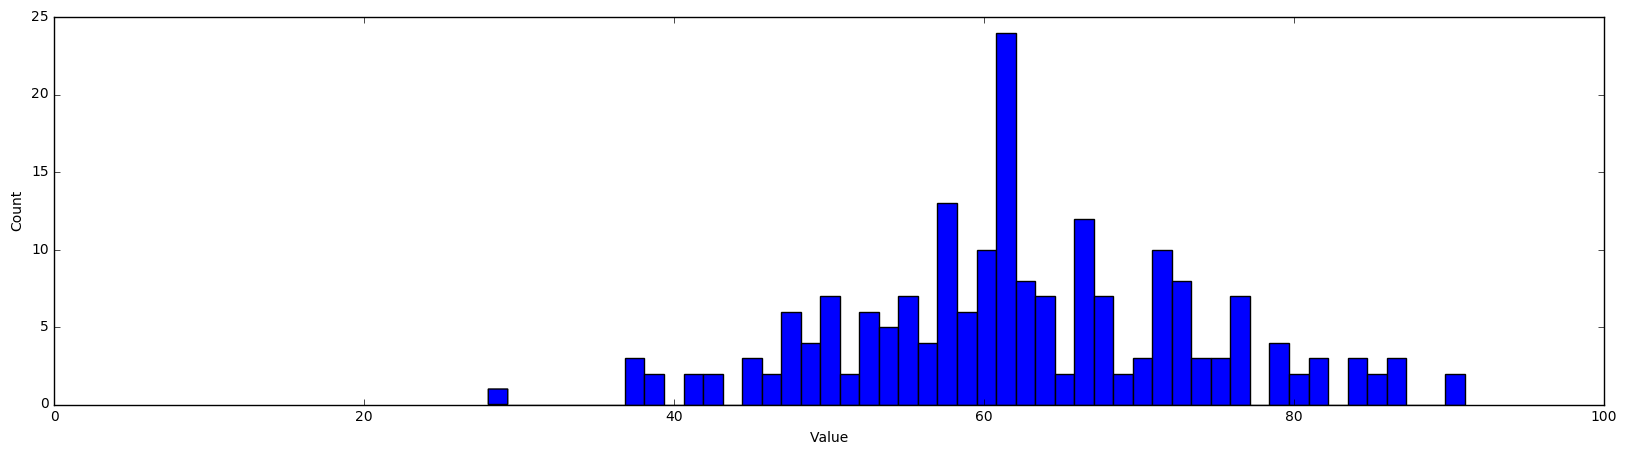

In [744]:
plt.figure(figsize=(20,5))
n, bins, patches = plt.hist(data, 50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.xlim(0, 100)
plt.show()

All data:
Percentiles: [28 55 62 70 91]


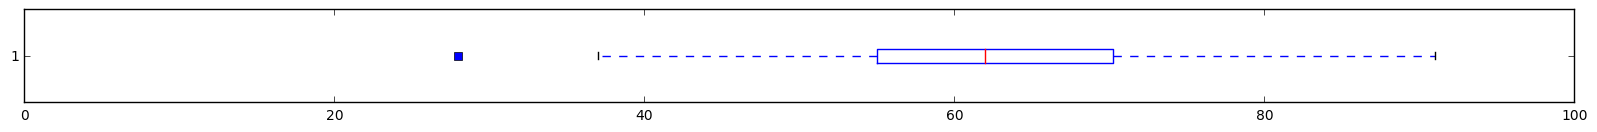

In [745]:
plt.figure(figsize=(20,1.2))
plt.xlim(0, 100)
plt.boxplot(data, 0, 'rs', 0)
print("All data:")
print("Percentiles: " + str(np.percentile(data, (0, 25, 50, 75, 100)).astype(int)))

In [746]:
print("So we can reason about the differences across multiple samples, let's draw 100 samples.")
print("We'll use this later to compare, but we'll only work with one single sample.")
np.random.seed(59)
samples = []
sample_size = 50
samples_taken = 100

for i in range(0, samples_taken):
  samples.append(np.random.choice(data, sample_size))

None

So we can reason about the differences across multiple samples, let's draw 100 samples.
We'll use this later to compare, but we'll only work with one single sample.


Here's our sample, the one we actually conduct.  In a real study, this is all we can see.
[67 66 77 63 68 65 62 60 47 63 43 72 45 51 90 59 58 80 54 57 55 50 58 64 38
 59 87 61 73 71 67 84 56 60 72 51 61 64 57 66 73 77 64 82 61 57 79 68 73 66]


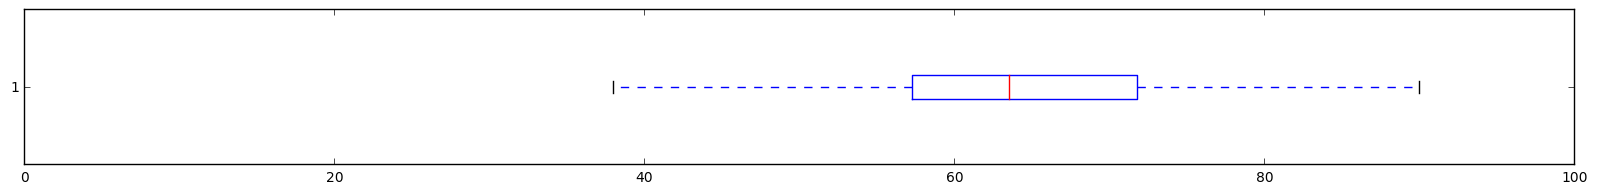

In [747]:
print("Here's our sample, the one we actually conduct.  In a real study, this is all we can see.")

print(samples[0])
plt.figure(figsize=(20,2))
plt.xlim(0, 100)
plt.boxplot(samples[0], 0, 'rs', 0)
None

Since we have all the data, keep in mind we could have drawn different samples that would have looked quite different, just from the sampling error alone.  Here are some examples:


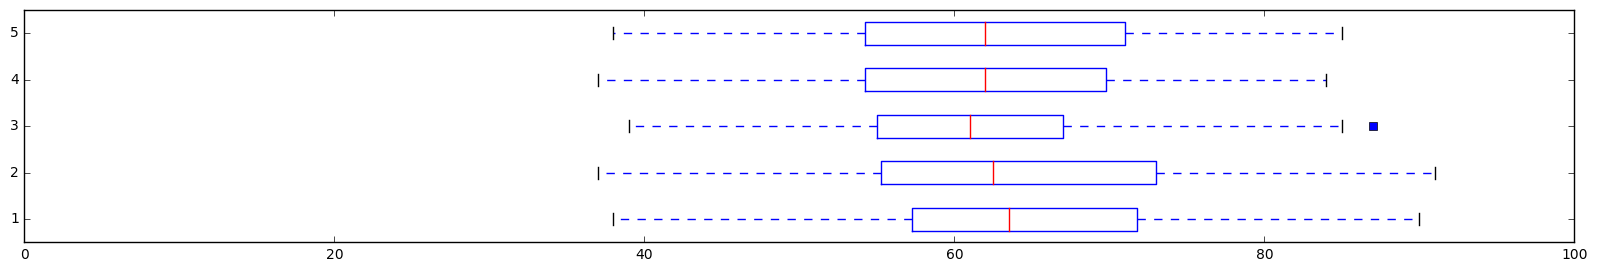

In [748]:
plt.figure(figsize=(20,3))
plt.xlim(0, 100)
plt.boxplot(samples[:5], 0, 'rs', 0)
print("Since we have all the data, keep in mind we could have drawn different samples that would have looked quite different, just from the sampling error alone.  Here are some examples:")

And different samples can have different means and different variances.
We won't know that in our study, but just keep in mind that repeated samples can be quite different - that's the whole point of sampling error.
This is the distribution of standard deviations across 100 samples:


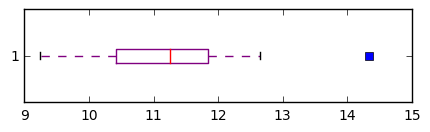

In [749]:
sample_stds = np.std(samples, axis=1)

print("And different samples can have different means and different variances.")
print("We won't know that in our study, but just keep in mind that repeated samples can be quite different - that's the whole point of sampling error.")
print("This is the distribution of standard deviations across 100 samples:")
plt.figure(figsize=(5,1.2))
bp = plt.boxplot(sample_stds, 0, 'rs', 0)
plt.setp(bp['boxes'], color='purple')
plt.setp(bp['whiskers'], color='purple')
None

In [750]:
print("Here we'll again use our perfect knowledge, and see that across those 100 samples, we'd get quite different sample means.")
print("As the sample size and number of samples increase, the distribution of the sample means will approximate a normal curve, regardless of the underlying distribution.")

Here we'll again use our perfect knowledge, and see that across those 100 samples, we'd get quite different sample means.
As the sample size and number of samples increase, the distribution of the sample means will approximate a normal curve, regardless of the underlying distribution.


Distribution of sample means:


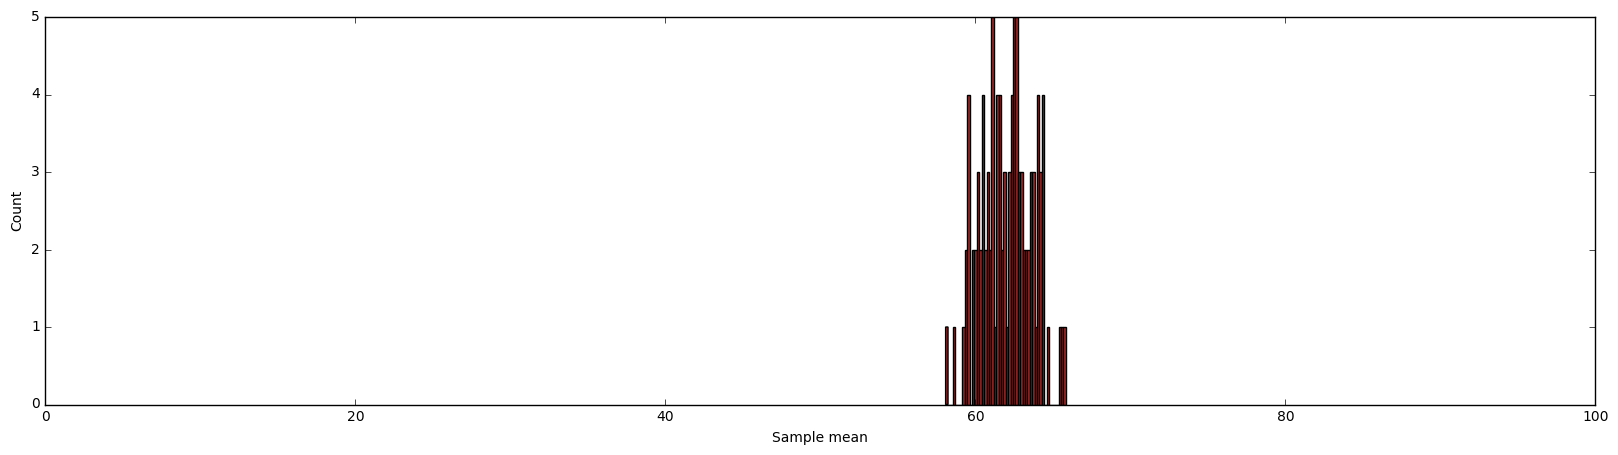

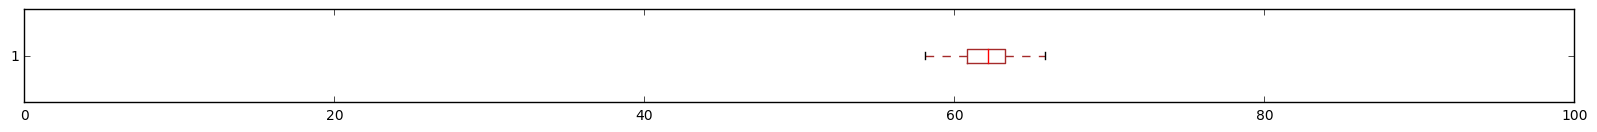

In [751]:
sample_means = np.mean(samples, axis=1)

print("Distribution of sample means:")
plt.figure(figsize=(20,5))
n, bins, patches = plt.hist(sample_means, 50, color="brown")
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.xlim(0, 100)
plt.show()

plt.figure(figsize=(20,1.2))
plt.xlim(0, 100)
bp = plt.boxplot(sample_means, 0, 'rs', 0)
plt.setp(bp['boxes'], color='brown')
plt.setp(bp['whiskers'], color='brown')
None

In [764]:
# from http://adventuresinpython.blogspot.com/2012/12/confidence-intervals-in-python.html
# assumes normal
# cheats and computes the actual population mean
def confidence_interval_with_cheating(sample):
  confidence = 0.95
  mu_or_estimate = np.mean(data)
  ss = stats.describe(sample)
  std = math.sqrt(ss.variance)
  return stats.norm.interval(1 - confidence,loc=mu_or_estimate,scale=std)

# assumes normal
# uses sample mean and standard deviation as approximation of populatio
def confidence_interval_procedure_A(sample):
  z_critical = stats.norm.ppf(q = 0.975) 
  sample_mean = np.mean(sample)
  pop_stdev = np.std(sample) # crazy assumption
  margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
  return (sample_mean - margin_of_error, sample_mean + margin_of_error) 

# assumes normal
# for when population standard deviation is unknown
def confidence_interval_t_distribution(sample):
  sample_mean = np.mean(sample)
  df = sample_size - 1 # not sure why
  t_critical = stats.t.ppf(q = 0.975, df=df)  # Get the t-critical value*
  sample_stdev = sample.std()    # Get the sample standard deviation
  sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
  margin_of_error = t_critical * sigma
  confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  
  return confidence_interval

def confidence_interval_with_estimates(sample):
  sample_mean = np.mean(sample)
  sigma = np.std(sample)
  return stats.t.interval(alpha = 0.95,              # Confidence level
                   df= sample_size - 1,       # Degrees of freedom
                   loc = sample_mean,         # Sample mean
                   scale = sigma)             # Standard deviation estimate

# via http://freakonometrics.hypotheses.org/18117
# http://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval
def confidence_interval_freakonometrics(sample):
  sample_mean = np.mean(sample)
  margin_of_error = 1.96 * math.sqrt((sample_mean * (1 - sample_mean)) / sample_size)
  return (sample_mean - margin_of_error, sample_mean + margin_of_error)

# using true population standard deviation and z-table for normal distribution
def confidence_interval_simple_with_std(sample):
  sample_mean = np.mean(sample)
  margin_of_error = 1.96 * np.std(data) / math.sqrt(sample_size)
  return (sample_mean - margin_of_error, sample_mean + margin_of_error)

# with unknown value of true population standard deviation, using t-table for student t-distribution
# it seems that this is still based on an assumption about the underlying distribution
# http://www.stat.wmich.edu/s216/book/node79.html
def confidence_interval_simple_without_std(sample):
  sample_mean = np.mean(sample)
  t_value = 1.660
  margin_of_error = t_value * np.std(sample) / math.sqrt(sample_size - 1)
  return (sample_mean - margin_of_error, sample_mean + margin_of_error)

def confidence_interval(sample):
  return confidence_interval_simple_without_std(sample)

None

In [765]:
print("Now let's look at confidence intervals.")
confidence_intervals = []
for sample in samples:
    confidence_intervals.append(confidence_interval(sample))

None

Now let's look at confidence intervals.


In [766]:
# debuggin

# print("Here we could make a few choices...")

# # https://www.khanacademy.org/math/statistics-probability/confidence-intervals-one-sample/estimating-population-mean/v/small-sample-size-confidence-intervals
# # two-sided table?
# print("Is the assumption in the Khan video about the distribution of the mean across samples, or the sample standard deviation?")
# print("...could assume a normal distribution for the sampling distribution, and use the sample standard deviation start, this does the simpler method (eg., the one in Khan Academy) that assumes the standard deviation of the sample is a good approximation for the whole population (which is a major red flag for the reasoning here).")
# print("... n<30 -> t-distribution with fatter tails.  Seems unquantitative")

# print(samples[0])
# print(np.mean(samples))
# print(stats.describe(sample))
# print(confidence_interval(samples[0]))
# print(confidence_intervals[0])
# None

Here's our sample on top.  Underneath is the confidence interval for the population mean computed from it.  The true population mean is drawn in orange.
We have know way of knowing whether the confidence interval from this sample bounds the population mean.
Since we can cheat, you can see this particular sample does actually bound the mean, but others may not.

In text, this confidence interval would look like: The 95% percentile confidence interval for the mean is 62.8 +/- 7.4


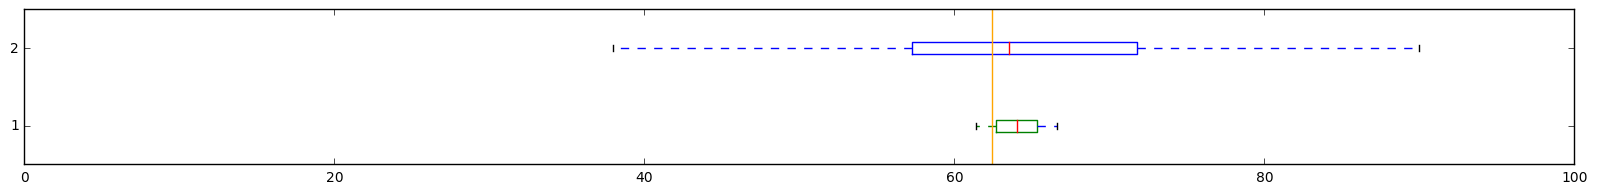

In [767]:
print("Here's our sample on top.  Underneath is the confidence interval for the population mean computed from it.  The true population mean is drawn in orange.")
print("We have know way of knowing whether the confidence interval from this sample bounds the population mean.")
print("Since we can cheat, you can see this particular sample does actually bound the mean, but others may not.")
print("")
print("In text, this confidence interval would look like: The 95% percentile confidence interval for the mean is 62.8 +/- 7.4")

plt.figure(figsize=(20,2))
plt.xlim(0, 100)
bp = plt.boxplot([confidence_intervals[0], samples[0]], 0, 'rs', 0)
plt.setp(bp['boxes'][0], color='green')
plt.setp(bp['whiskers'][0], color='green')
plt.axvline(x=np.mean(data), color="orange")
None

Now let's look at the confidence intervals for the 100 samples we drew, sorted:


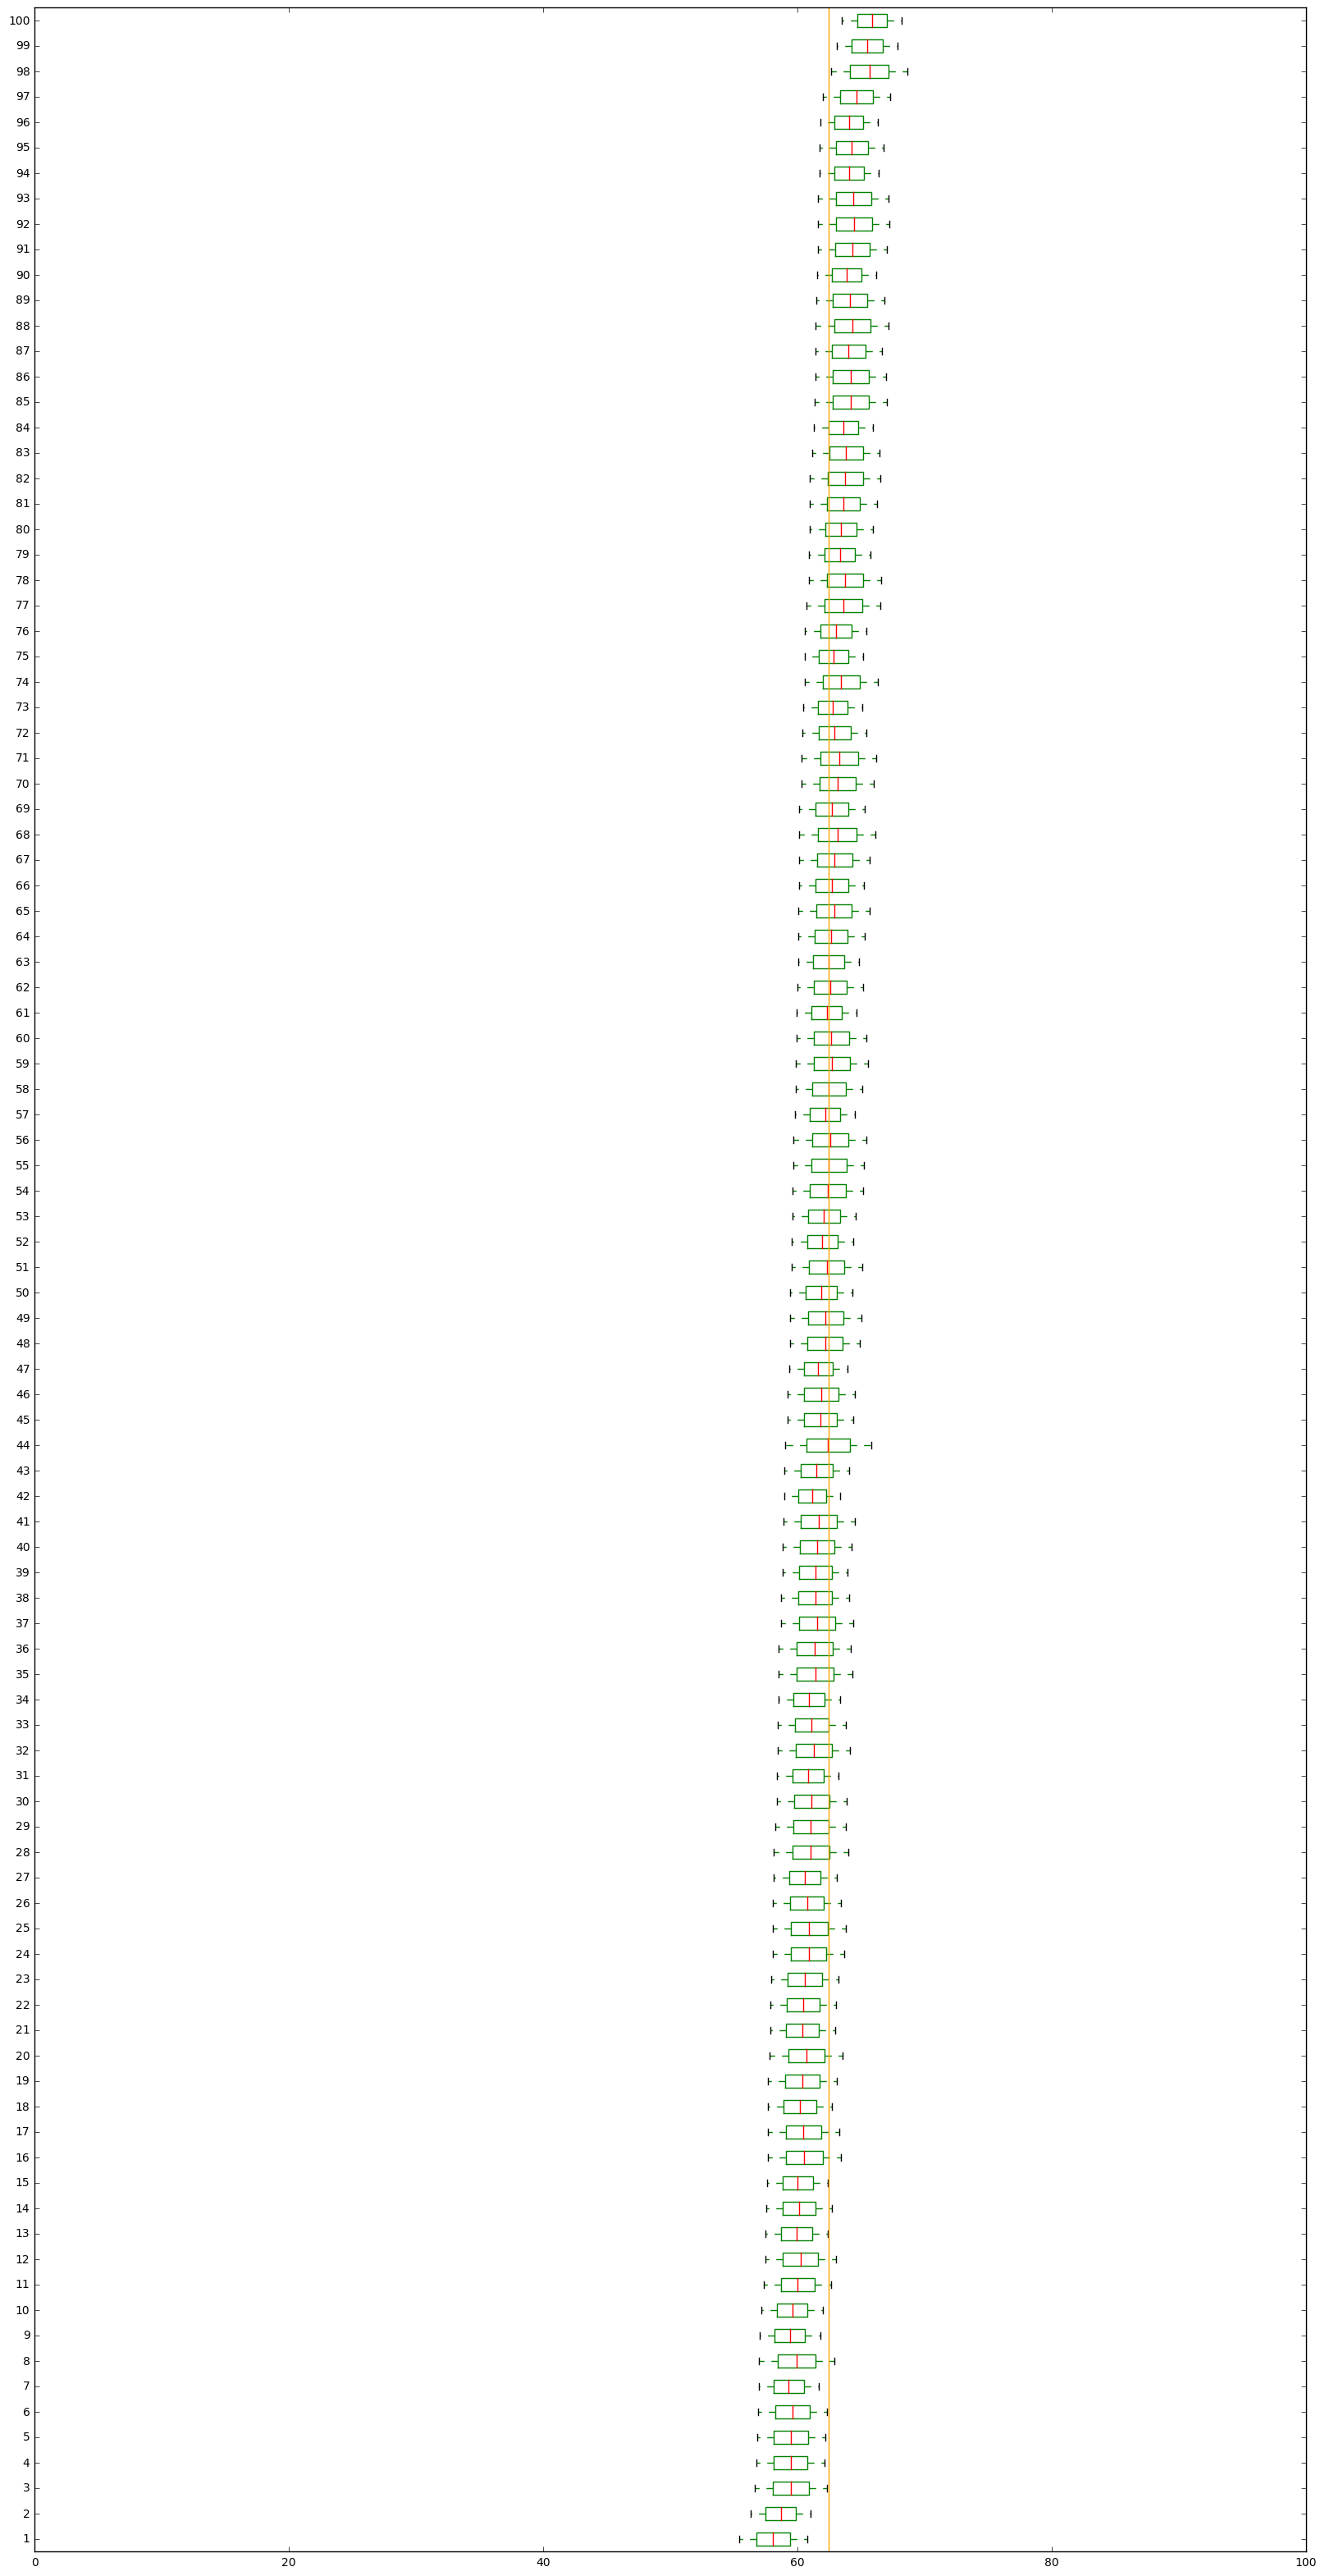

In [768]:
# similar: https://en.wikipedia.org/wiki/File:NYW-confidence-interval.svg

plt.figure(figsize=(20,40))
plt.xlim(0, 100)
bp = plt.boxplot(sorted(confidence_intervals), 0, 'rs', 0)
plt.axvline(x=np.mean(data), color="orange")
plt.setp(bp['boxes'], color='green')
plt.setp(bp['whiskers'], color='green')
print("Now let's look at the confidence intervals for the 100 samples we drew, sorted:")

In [769]:
print("And here's a flavor of what some of these could look like when written as text:")
print("")

texts = []
for ci in sorted(confidence_intervals):
  texts.append(str(np.mean(ci)) + " =/- " + str(round(np.mean(ci) - ci[0], 1)))

# np.random.seed(18)
# for text in np.random.choice(texts, 5):
#   print(text)
print(texts[0])
print(texts[25])
print(texts[50])
print(texts[75])
print(texts[-1])

print("")
print("Keep in mind this is all just from sampling error, and all are equally likely to have been the sample we drew.")

And here's a flavor of what some of these could look like when written as text:

58.08 =/- 2.7
60.74 =/- 2.7
62.28 =/- 2.8
63.0 =/- 2.4
65.84 =/- 2.3

Keep in mind this is all just from sampling error, and all are equally likely to have been the sample we drew.


Graphically, any of these values could be drawn for the midpoint.
Distribution of all confidence interval midpoints:


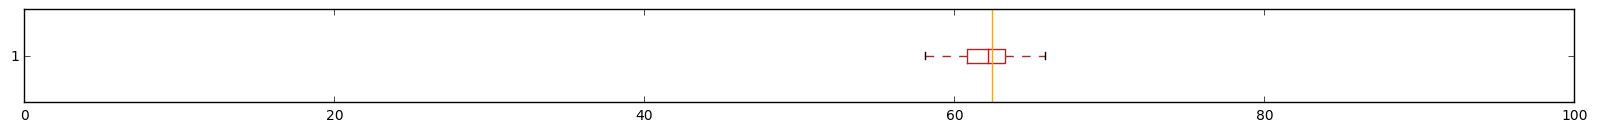

In [770]:
print("Graphically, any of these values could be drawn for the midpoint.")
confidence_interval_midpoints = np.mean(confidence_intervals, axis=1)
plt.figure(figsize=(20,1.2))
plt.xlim(0, 100)
bp = plt.boxplot(confidence_interval_midpoints, 0, 'rs', 0)
plt.setp(bp['boxes'], color='brown')
plt.setp(bp['whiskers'], color='brown')
plt.axvline(x=np.mean(data), color="orange")
print("Distribution of all confidence interval midpoints:")

In [771]:
print("And the confidence intervals for some of the samples produce intervals that don't even bound the mean.")
print("Percent of confidence intervals that contain the true population mean:")


And the confidence intervals for some of the samples produce intervals that don't even bound the mean.
Percent of confidence intervals that contain the true population mean:


In [772]:
good = []
bad = []

for confidence_interval in confidence_intervals:
  (lower, upper) = confidence_interval
  if lower <= np.mean(data) <= upper:
    good.append(confidence_interval)
  else:
    bad.append(confidence_interval)

print((len(good), len(bad)))
print(str(len(good)) + "% of the confidence intervals bound the mean")

(86, 14)
86% of the confidence intervals bound the mean


In [773]:
None